In [1]:
import pickle
import os
import random
import sqlite3

conn = sqlite3.connect('yelp_dataset.db')
c = conn.cursor()

def Select(q):
    return c.execute(q)

def Update(q):
    c.execute(q)
    conn.commit()

In [2]:
q=Select("select user_id, business_id, starts, review_text from Reviews ")

In [3]:
from collections import defaultdict

In [4]:
users = {}
items = {}
review_length = []
ratings = []



In [5]:
for row in q:
    user = row[0]
    item = row[1]
    rating = float(row[2])
    word_len = row[3].split()
    if user not in users:
        users[user]  = []
    if item not in items:
        items[item] = []
    users [user]+= [rating]
    items[item] += [rating]
    ratings += [rating]
    review_length += [len(word_len)]

In [6]:
import matplotlib.pyplot as plt

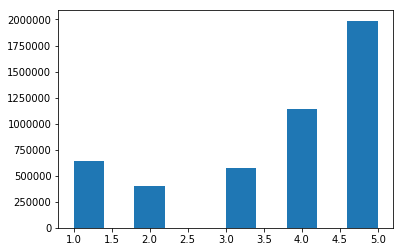

In [7]:
plt.hist(ratings)
plt.show()

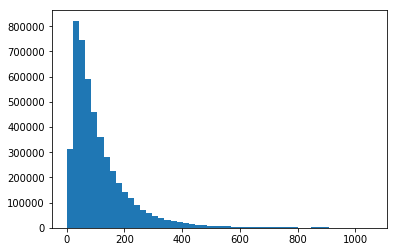

In [8]:
plt.hist(review_length,50)
plt.show()

In [9]:
import numpy 
user_stats = {}
stddevs = []
means = []
num_revs = []

In [10]:
for user in users:
    stddevs += [numpy.std(numpy.array(users[user]))]
    means += [numpy.mean(numpy.array(users[user]))]
    num_revs += [len(users[user])]
#     user_stats[user] = {'stddev':stddev,'mean':mean} 

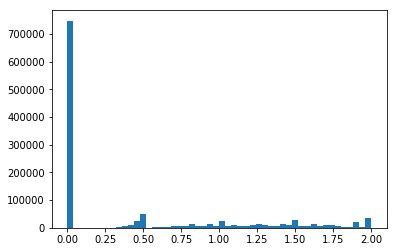

In [11]:
plt.hist(stddevs,50)
plt.show()

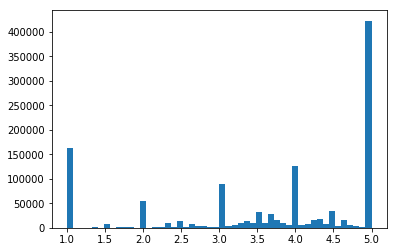

In [12]:
plt.hist(means,50)
plt.show()

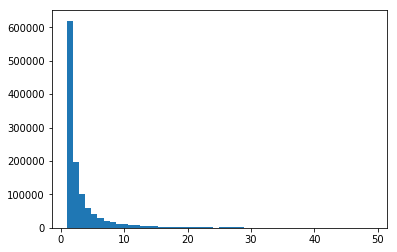

In [13]:
plt.hist(list(filter(lambda x: x<50,sorted(num_revs))),50)
plt.show()

In [14]:
numpy.mean(num_revs), numpy.std(num_revs), numpy.median(num_revs)

(4.0029145772806629, 13.845164728997695, 1.0)

In [15]:
import numpy 
user_stats = {}
item_stats = {}
stddevs = []
means = []
num_revs = []

In [16]:
for item in items:
    stddevs += [numpy.std(numpy.array(items[item]))]
    means += [numpy.mean(numpy.array(items[item]))]
    num_revs += [len(items[item])]
#     user_stats[user] = {'stddev':stddev,'mean':mean} 

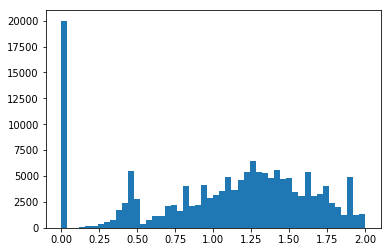

In [17]:
plt.hist(stddevs,50)
plt.show()

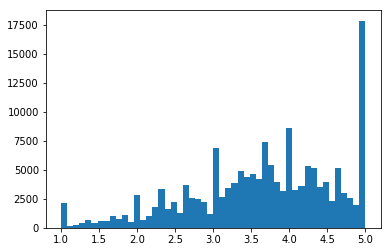

In [18]:
plt.hist(means,50)
plt.show()

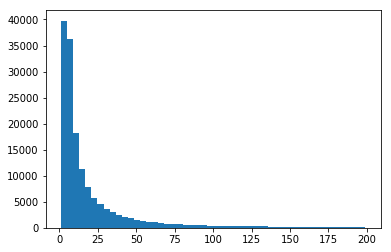

In [19]:
plt.hist(list(filter(lambda x: x<200,sorted(num_revs))),50)
plt.show()

In [20]:
numpy.mean(num_revs), numpy.std(num_revs), numpy.median(num_revs)

(30.241046233991753, 96.489594745544565, 9.0)

In [21]:
conn.close()